In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Loading

In [3]:
import pandas as pd

# Specify the path to your file (assuming it's in the root of your Google Drive)
file_path = '/content/drive/MyDrive/liver_cirrhosis.csv'

# Load the file using pandas read_csv
df = pd.read_csv(file_path)



# Importing the required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna, warnings, random
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#plt.style.use('dark_background')
warnings.simplefilter('ignore', category=FutureWarning)

# DATA EXPLORATION

In [9]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [10]:
df.shape

(25000, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [12]:
pd.DataFrame(df.isna().sum()).T.style.background_gradient(cmap='coolwarm')
## Generating a styled DataFrame that shows the distribution of missing values in each column with a coolwarm color gradient

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Generating a styled summary statistics DataFrame with specific percentiles and coolwarm color gradient
df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'coolwarm')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
N_Days,25000.000000,1887.117040,1091.690918,41.000000,41.000000,1080.000000,1170.000000,1680.000000,2576.000000,2834.000000,4795.000000,4795.000000
Age,25000.000000,18495.877080,3737.596616,9598.000000,9598.000000,15694.000000,16300.000000,18499.000000,20955.000000,21915.000000,28650.000000,28650.000000
Bilirubin,25000.000000,3.402644,4.707491,0.300000,0.300000,0.800000,0.900000,1.300000,3.400000,5.000000,28.000000,28.000000
Cholesterol,25000.000000,372.331471,193.668452,120.000000,120.000000,275.000000,299.000000,369.510563,369.510563,382.000000,1775.000000,1775.000000
Albumin,25000.000000,3.486578,0.380488,1.960000,1.960000,3.290000,3.350000,3.510000,3.750000,3.800000,4.640000,4.640000
Copper,25000.000000,100.184663,73.184840,4.000000,4.000000,52.000000,62.000000,97.648387,107.000000,123.000000,588.000000,588.000000
Alk_Phos,25000.000000,1995.675597,1798.885660,289.000000,289.000000,1032.000000,1128.000000,1828.000000,1982.655769,1982.655769,13862.400000,13862.400000
SGOT,25000.000000,123.166345,47.747616,26.350000,26.350000,92.000000,98.000000,122.556346,134.850000,151.900000,457.250000,457.250000
Tryglicerides,25000.000000,123.822548,52.786350,33.000000,33.000000,92.000000,101.000000,124.702128,127.000000,139.000000,598.000000,598.000000
Platelets,25000.000000,256.007337,98.679006,62.000000,62.000000,189.000000,203.000000,251.000000,311.000000,329.000000,721.000000,721.000000


In [15]:
# Define the target column and select numerical columns
target = 'Stage'
num_cols = df.select_dtypes('number').columns
num_cols = num_cols[num_cols != target]

# Select object (categorical) columns
obj_cols = df.select_dtypes(object).columns

# Output the number of numerical and categorical columns
num_numerical_cols = len(num_cols)
num_categorical_cols = len(obj_cols)
num_numerical_cols, num_categorical_cols

(11, 7)

# Data Visualization

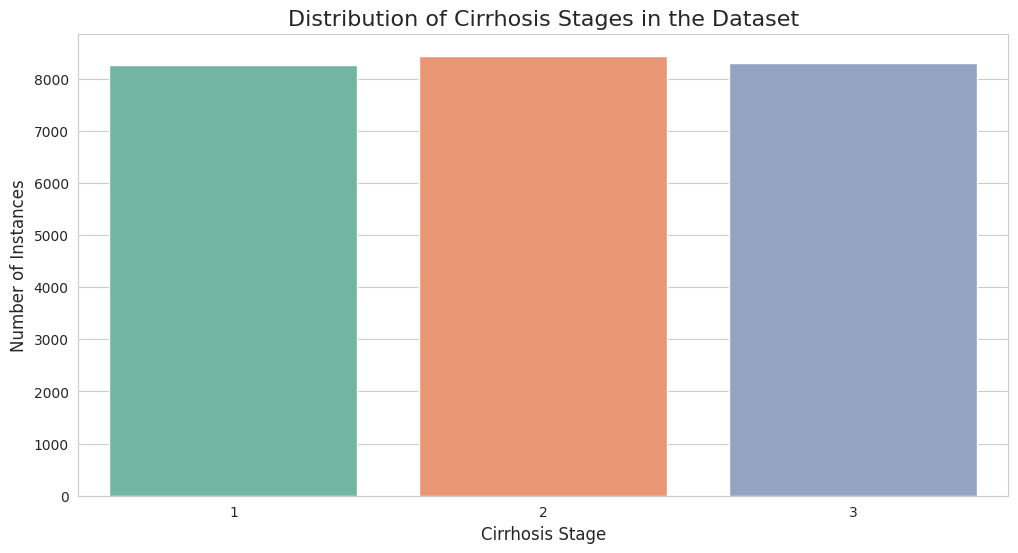

In [16]:
# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a count plot with custom color palette for the 'Stage' variable in the DataFrame 'df'
sns.countplot(data=df, x='Stage', palette='Set2')

# Add title and labels
plt.title('Distribution of Cirrhosis Stages in the Dataset', fontsize=16)
plt.xlabel('Cirrhosis Stage', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()



*The distribution of instances among the different stages of Cirrhosis in this dataset is fairly uniform, indicating a well-balanced representation across all stages.*

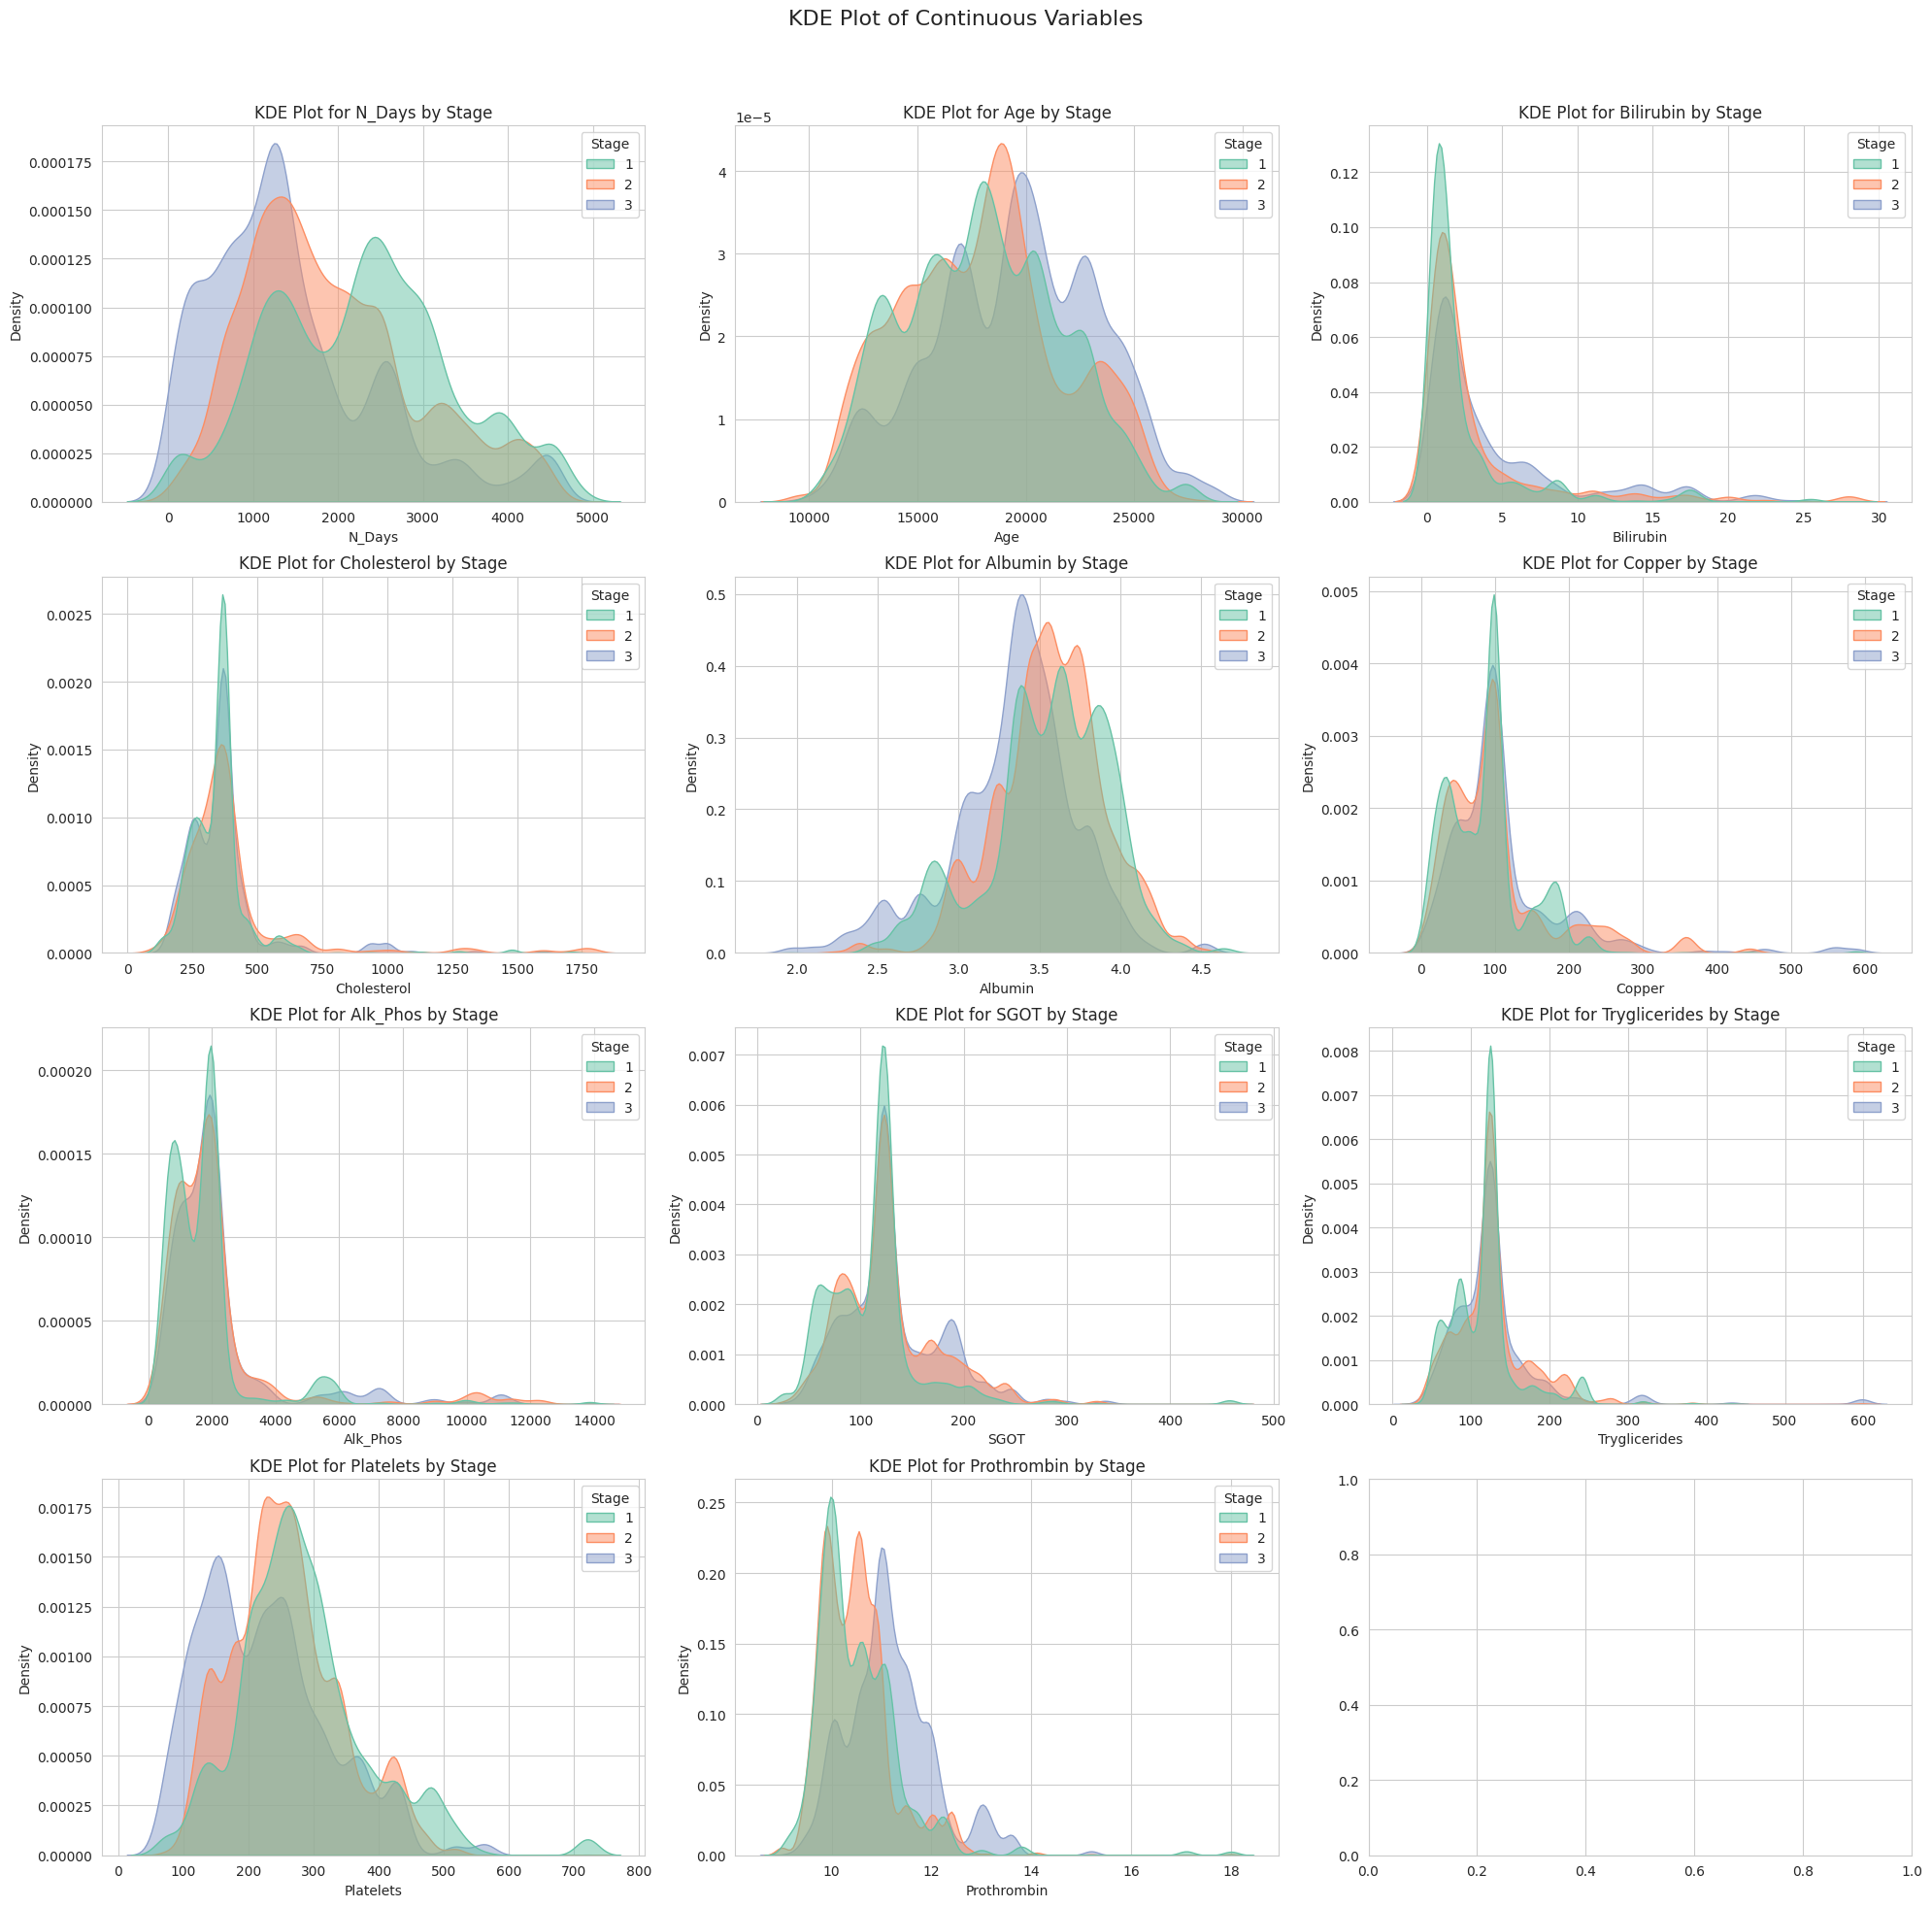

In [17]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('KDE Plot of Continuous Variables', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot KDE for each continuous variable colored by 'target'
for i, col in enumerate(num_cols):

    sns.kdeplot(data=df, x=col, hue=target, palette='Set2', alpha=0.5, fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col} by {target}', fontsize=12)

# Adjust layout to prevent title overlap and figure clustering
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjusting the top spacing for the figure title
plt.show()




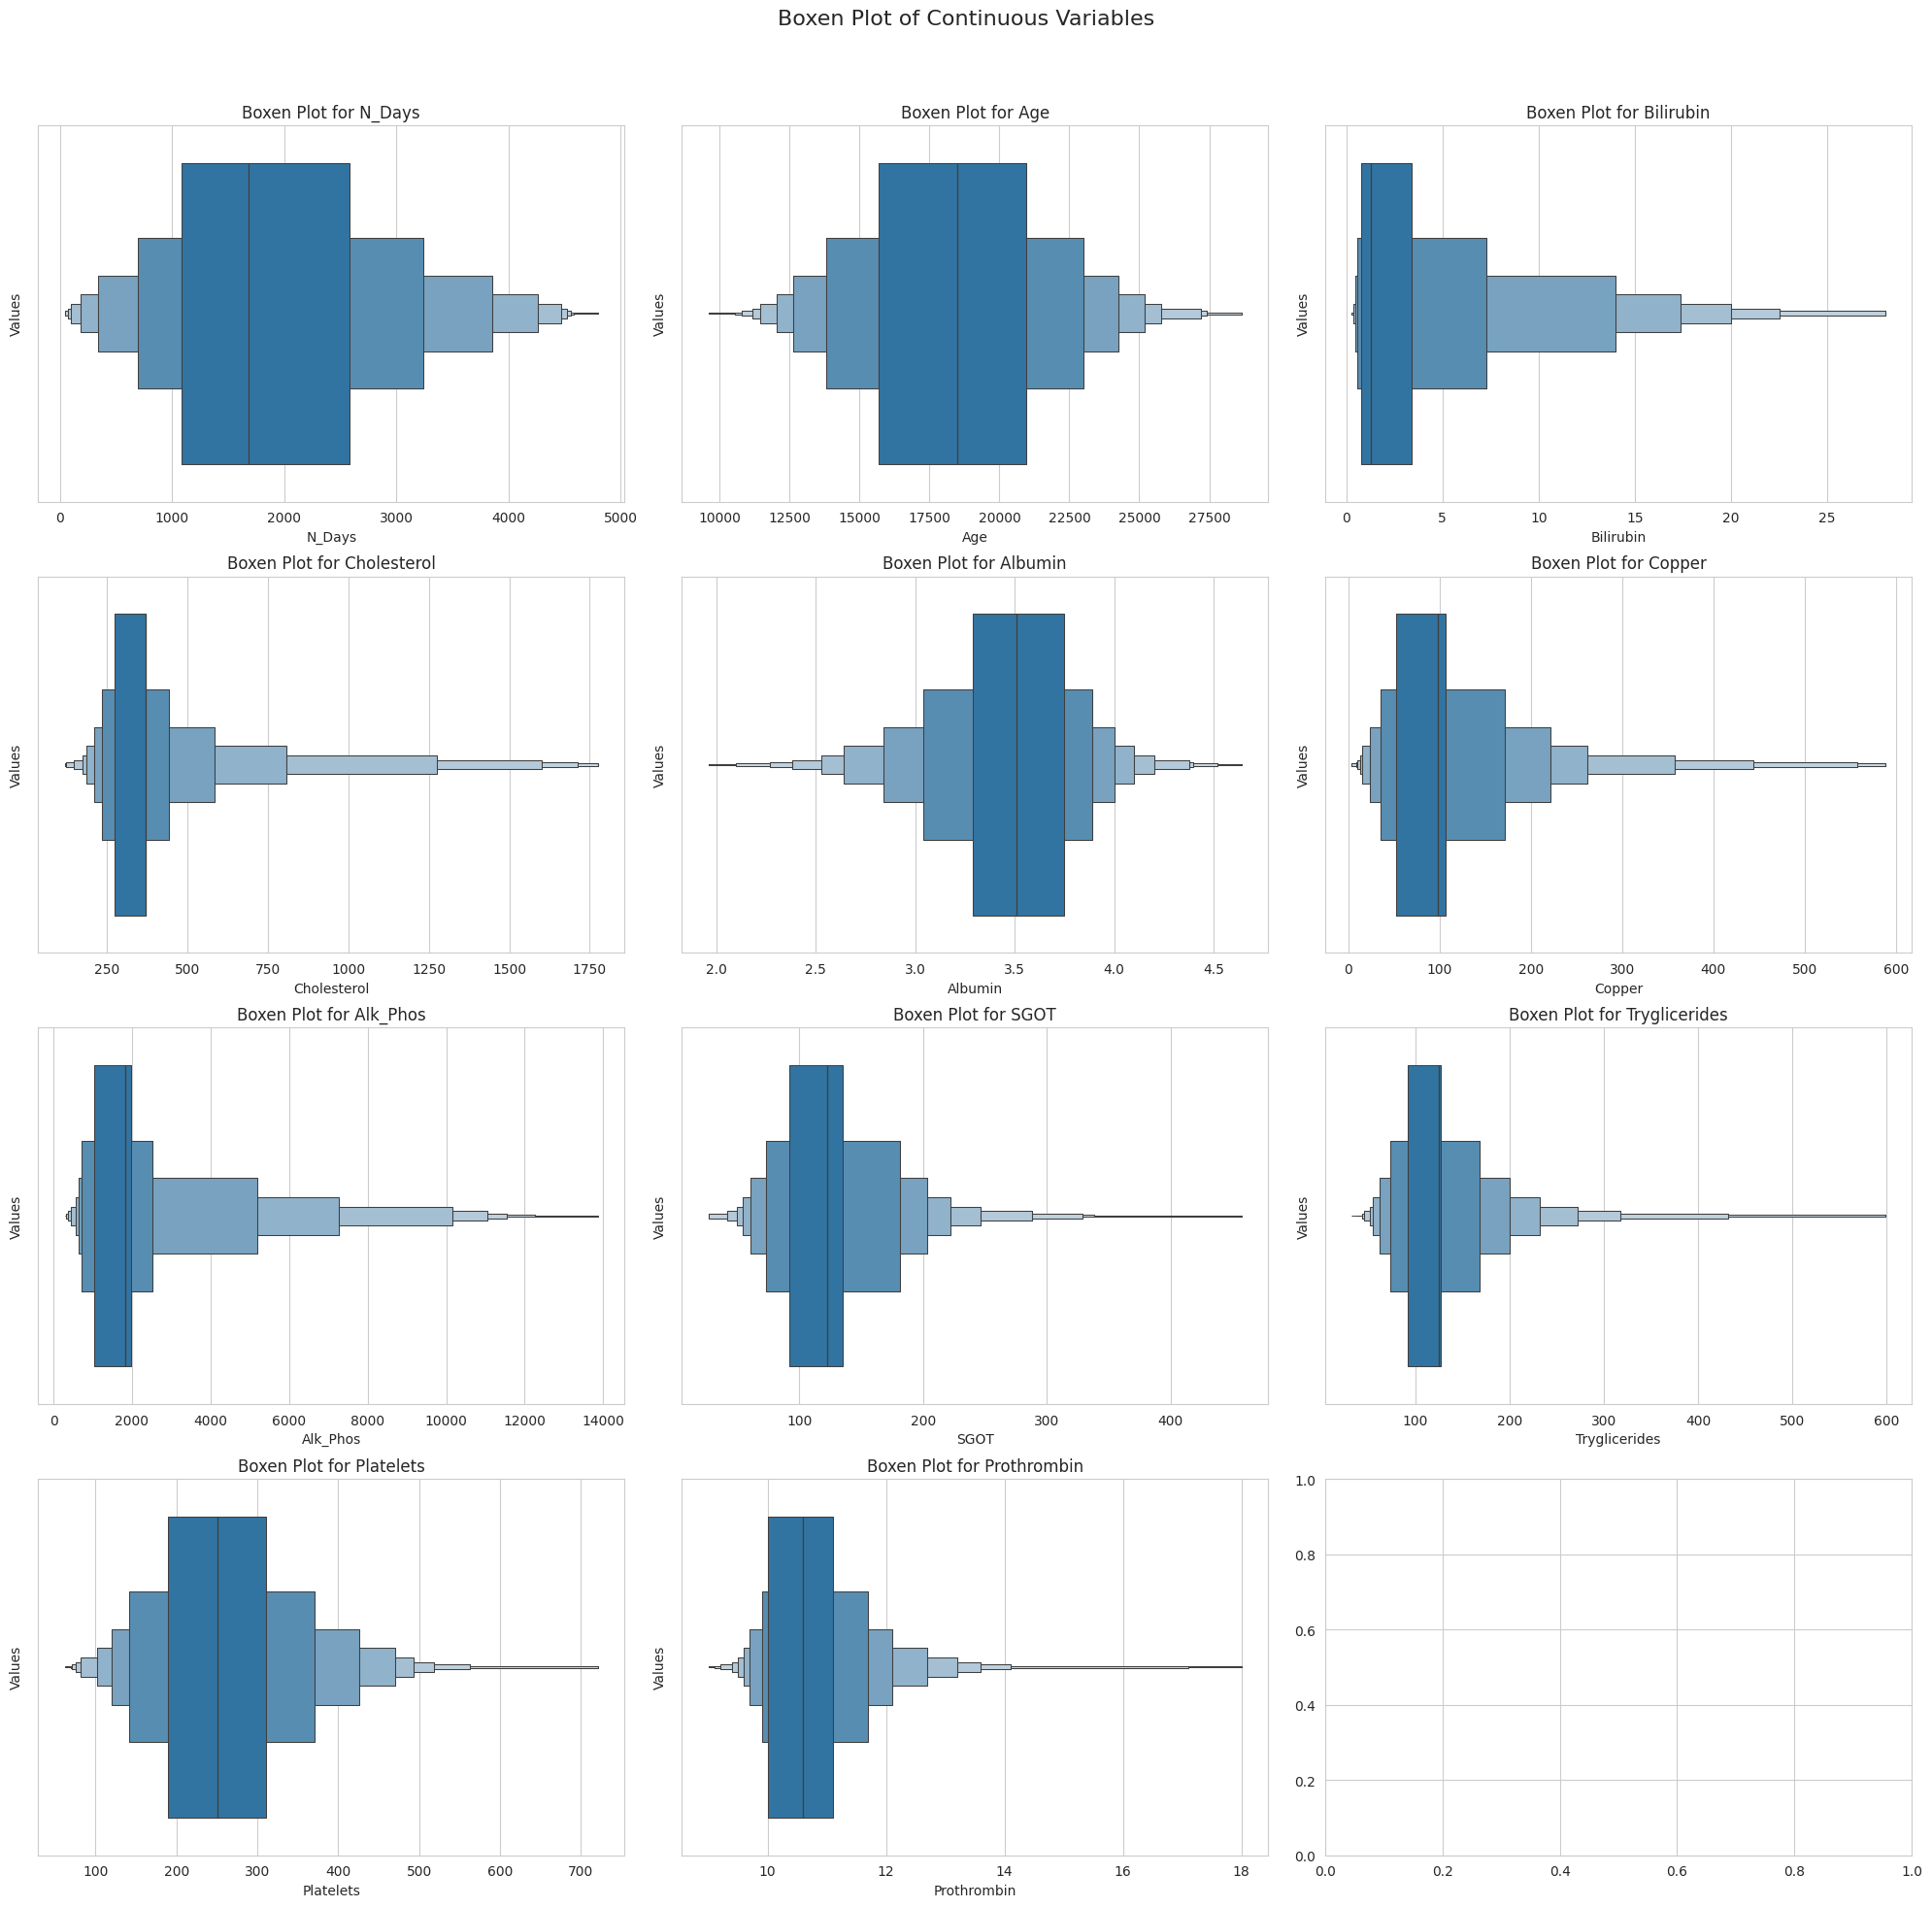

In [18]:

# Set up the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Boxen Plot of Continuous Variables', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot Boxen plots for each continuous variable excluding the 12th plot (triglycerides) and color randomly
for i, (col, ax) in enumerate(zip(num_cols, axes)):

    sns.boxenplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxen Plot for {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
# Adjust layout to prevent title overlap and figure clustering
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjusting the top spacing for the figure title
plt.show()


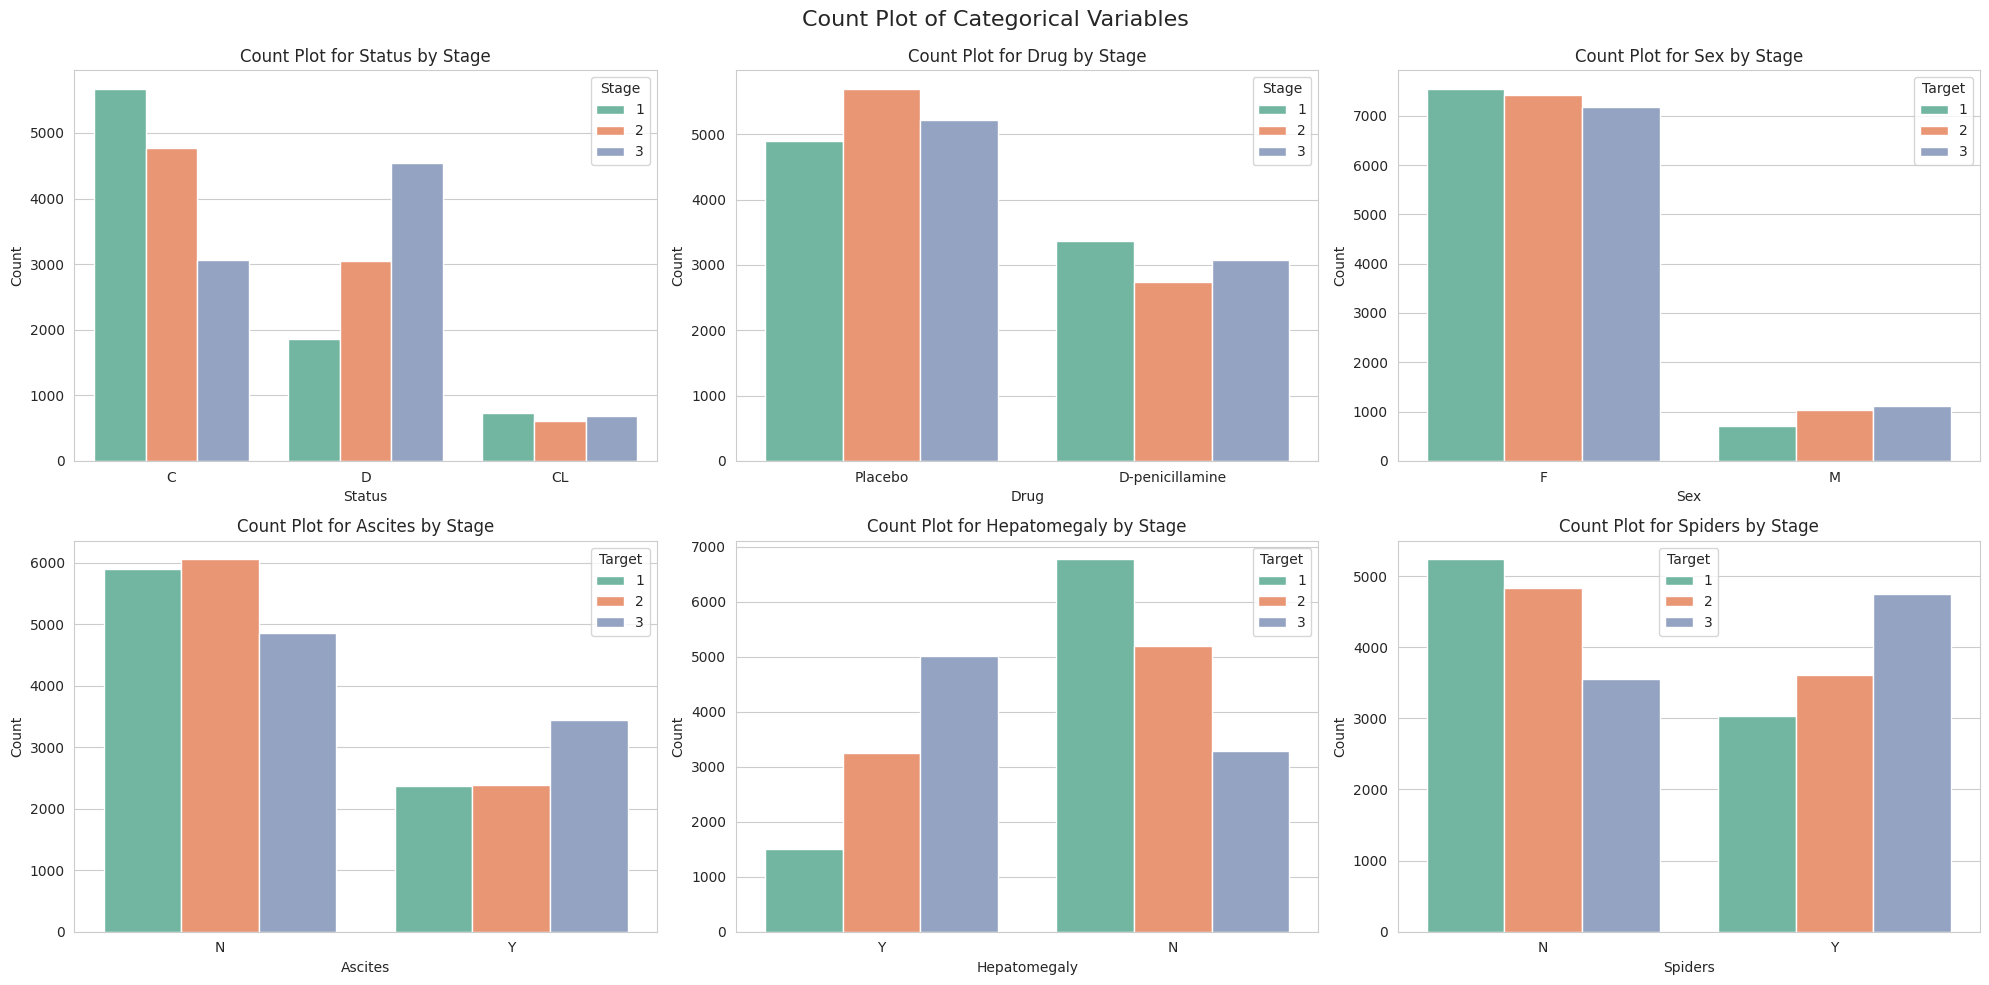

In [20]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Count Plot of Categorical Variables', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot count plots for each categorical variable colored by 'target'
for i, (col, ax) in enumerate(zip(obj_cols, axes)):

    sns.countplot(data=df, x=col, ax=ax, hue=target,  palette='Set2')
    ax.set_title(f'Count Plot for {col} by {target}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    if i > 1:
        ax.legend(title='Target')

# Adjust layout to prevent title overlap and figure clustering
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjusting the top spacing for the figure title
plt.show()

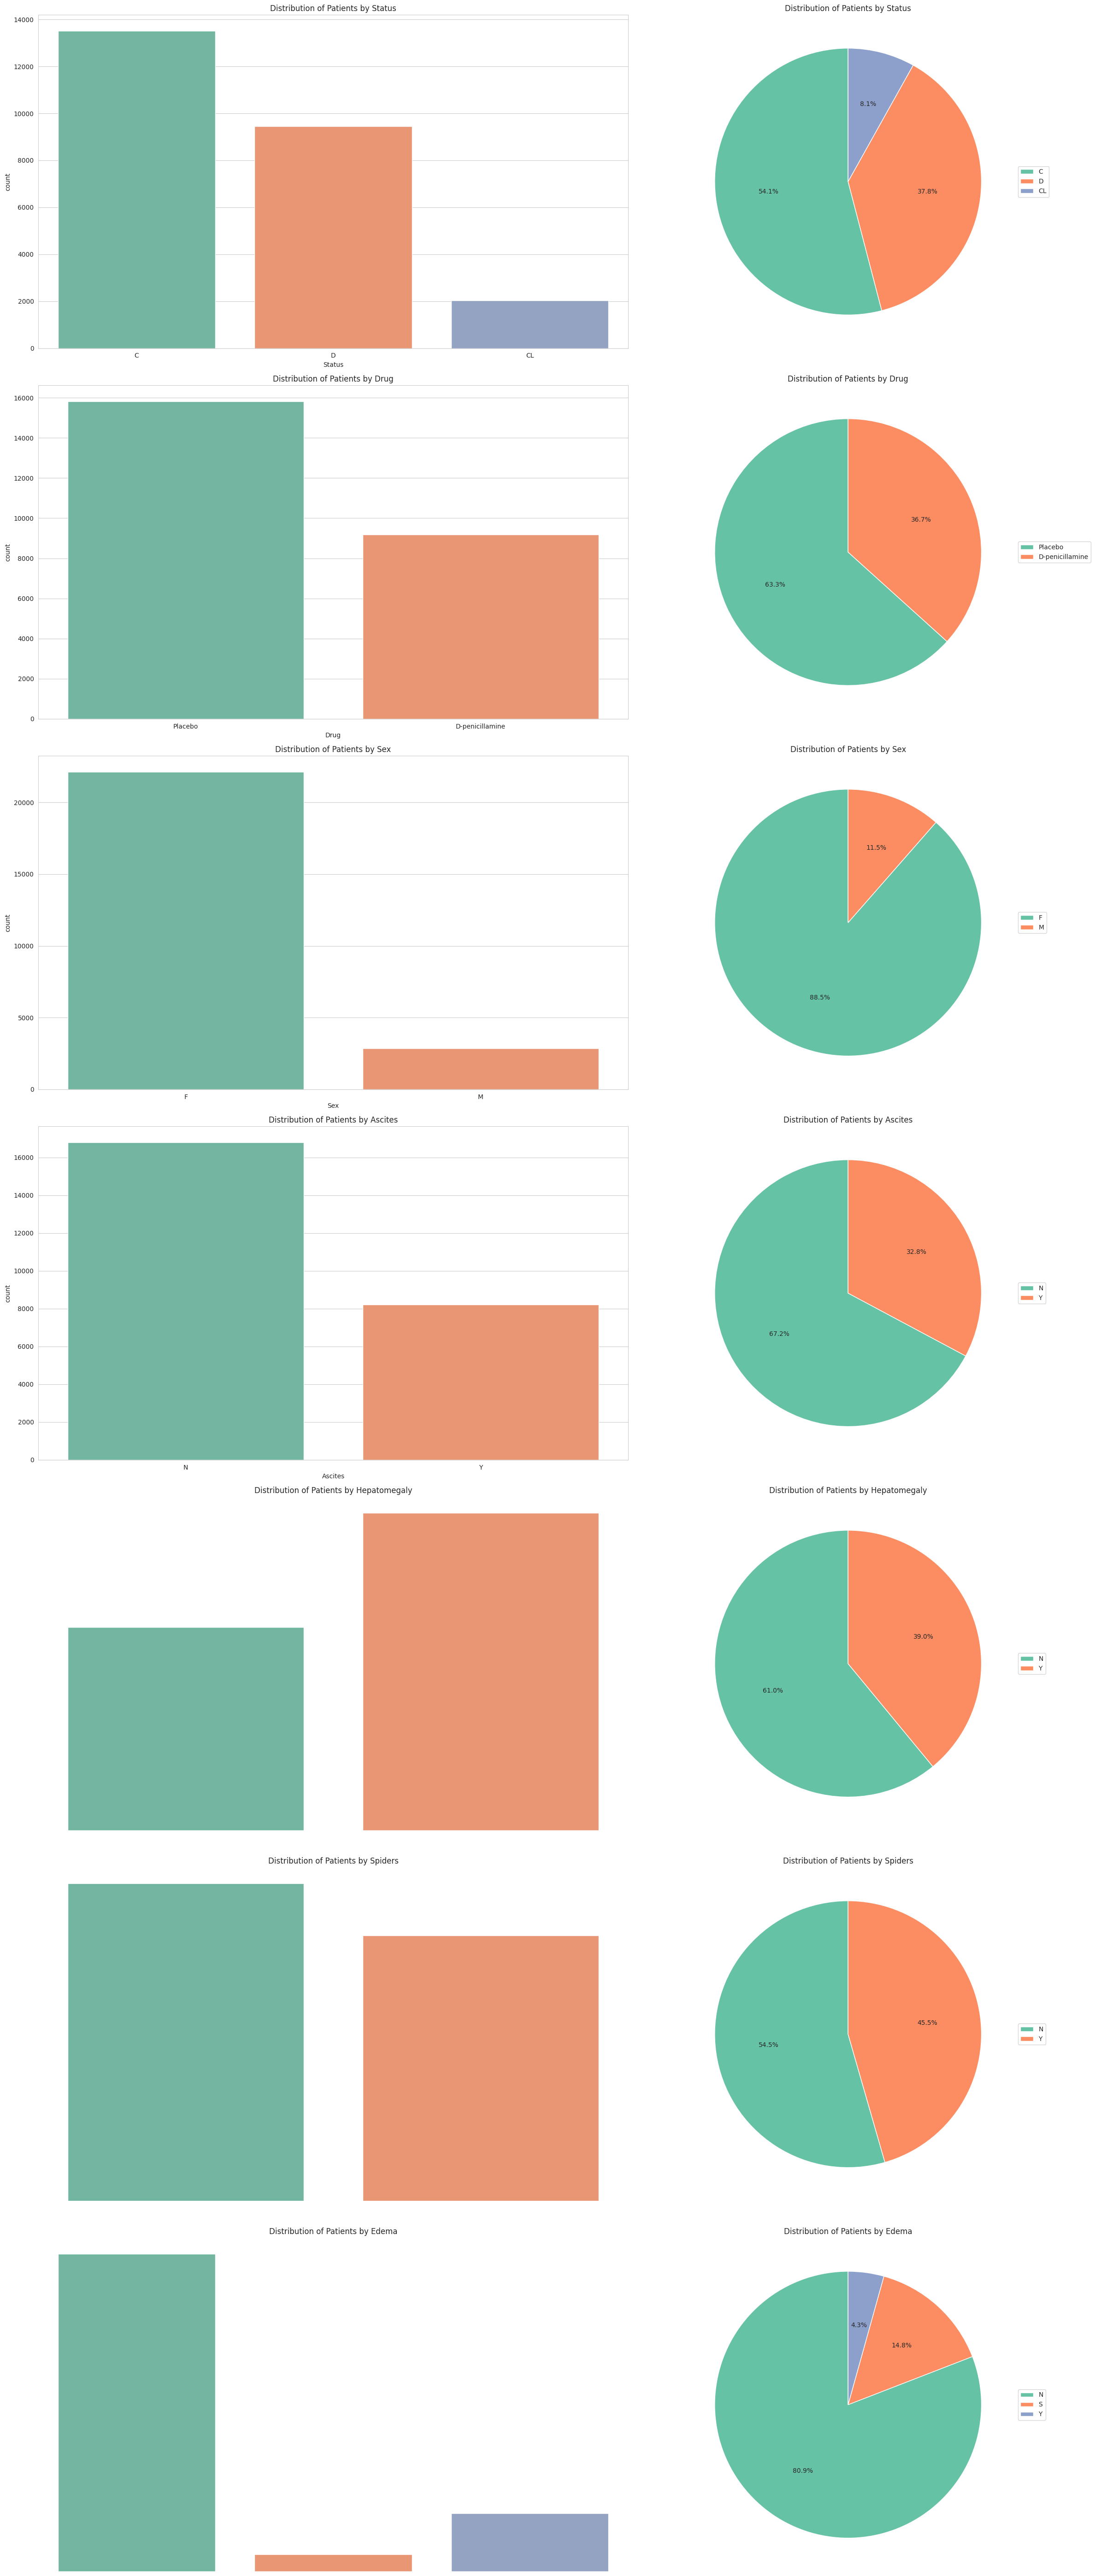

In [19]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(obj_cols), ncols=2, figsize=(25, 8*len(obj_cols)))

# Iterate through each column and plot a countplot and pie chart
for i, column in enumerate(obj_cols):

    # Plot countplot
    sns.countplot(data=df, x=column, ax=axes[i, 0], palette='Set2')  # Select a suitable color palette
    axes[i, 0].set_title(f'Distribution of Patients by {column.capitalize()}')

    # Plot pie chart
    df[column].value_counts().plot.pie(ax=axes[i, 1], autopct='%1.1f%%', startangle=90, labels=None, colors=sns.color_palette('Set2'))
    axes[i, 1].set_title(f'Distribution of Patients by {column.capitalize()}')
    axes[i, 1].set_ylabel('')

    # Add labels to the pie chart
    labels = df[column].value_counts().index
    axes[i, 1].legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Hide any remaining empty subplots
for j in range(len(obj_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()



***The cohort analysis revealed intriguing distributions among various patient demographics and conditions:***

1.   54% of the participants remained censored, indicating they were alive throughout the study. Approximately 38% of patients succumbed during the research period, while the remaining individuals underwent liver transplantation.

2.   Treatment-wise, 63.3% of the subjects were under Placebo treatment, with the remaining recipients opting for actual Drug Treatment.

3.   Gender distribution revealed a notable imbalance, with 88.5% of the subjects identified as female, signifying a significant gender skew in the study.

4.   Common liver conditions were prevalent among the subjects, with approximately 67% exhibiting Ascites and 61% without Hepatomegaly.

5.   The occurrence of Spiders in subjects was evenly distributed, with a near 55-45 ratio between individuals with and without this condition.

6.   Edema characteristics showcased marked variations, as 81% of subjects did not present with Edema. About 15% of individuals exhibited edema, either untreated or resolved by diuretics, while a minority experienced Edema regardless of diuretics.

*Notably, an even distribution was observed across different stages, indicating a balanced representation of subjects in each stage of the study.*




# Data Manipulation

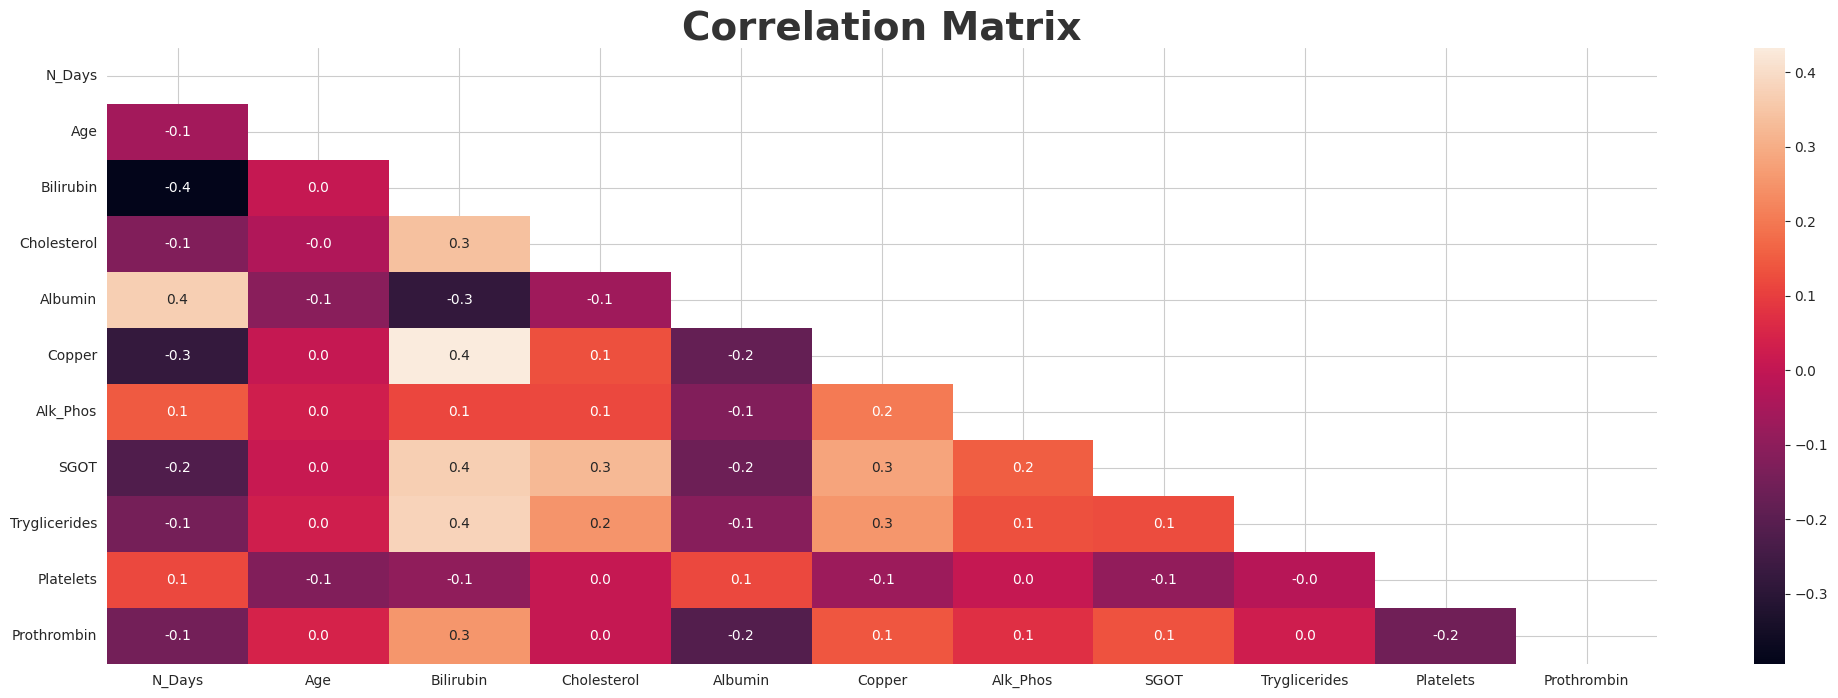

In [23]:
# Creating the figure and gridspec
fig = plt.figure(figsize=(25, 8))
gs = fig.add_gridspec(1, 1)

# Customize the grid layout
gs.update(wspace=0.3, hspace=0.15)

# Adding a subplot to the figure
ax = fig.add_subplot(gs[0, 0])

# Setting the title with customized style
ax.set_title("Correlation Matrix", fontsize=28, fontweight='bold' ,color="#333333")

# Generating the heatmap with correlation values
sns.heatmap(df[num_cols].corr().transpose(), mask=np.triu(np.ones_like(df[num_cols].corr().transpose())),
            fmt=".1f", annot=True,  ax=ax)

# Display the plot
plt.show()

The variables in the dataset exhibit no correlation with each other, demonstrating a lack of multicollinearity. This absence of interrelationships between features indicates that there are no discernible patterns of high correlation or redundancy among the variables, contributing to the absence of multicollinearity in the dataset.

In [24]:
df_copy = df.copy()
df_copy.groupby('Stage')[num_cols].median()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Stage,,,,,,,,,,,
1,2286.0,17874.0,1.0,369.510563,3.61,97.648387,1692.000000,119.350000,124.702128,271.0,10.3
2,1725.0,18199.0,1.3,369.510563,3.56,97.648387,1812.000000,122.556346,124.702128,252.0,10.4
3,1301.0,19698.0,2.1,369.510563,3.40,97.648387,1982.655769,122.556346,124.702128,214.0,11.0


In [25]:
df_copy.groupby('Stage')[num_cols].mean()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Stage,,,,,,,,,,,
1,2284.828554,18004.023472,2.473793,350.900239,3.554295,87.744561,1780.649417,110.767812,117.236957,285.558976,10.535287
2,1922.650634,17963.688426,3.315283,402.436138,3.566402,101.302676,2050.772023,127.271112,126.638613,257.613371,10.496682
3,1454.632747,19527.631903,4.417157,363.049538,3.337860,111.443439,2153.877000,131.344009,127.519137,224.924527,11.175197


Patients with advanced stages of Liver Cirrhosis exhibit significantly elevated levels of Bilirubin, Copper, and Alkaline Phosphatase compared to individuals in lower stages of the condition.

Elderly individuals demonstrate a higher propensity for progressing to Stage 3 Liver Cirrhosis, indicating an age-related association with disease severity and progression.

Moreover, subjects in Stage 3 of Liver Cirrhosis exhibit a shorter duration (N_days) within this stage, implying a higher likelihood of mortality or undergoing liver transplant procedures among patients in the most advanced stage of the condition.

In [26]:
df_copy.groupby('Sex')[num_cols].mean()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Sex,,,,,,,,,,,
F,1886.302254,18305.796269,3.400203,373.050688,3.482393,99.151371,1978.688322,123.176515,123.654476,259.023914,10.719557
M,1893.417045,19965.600768,3.421516,366.770418,3.518942,108.174179,2127.022892,123.087711,125.122101,232.682861,10.850472


In [27]:
df_copy.groupby('Sex')[num_cols].mean()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Sex,,,,,,,,,,,
F,1886.302254,18305.796269,3.400203,373.050688,3.482393,99.151371,1978.688322,123.176515,123.654476,259.023914,10.719557
M,1893.417045,19965.600768,3.421516,366.770418,3.518942,108.174179,2127.022892,123.087711,125.122101,232.682861,10.850472


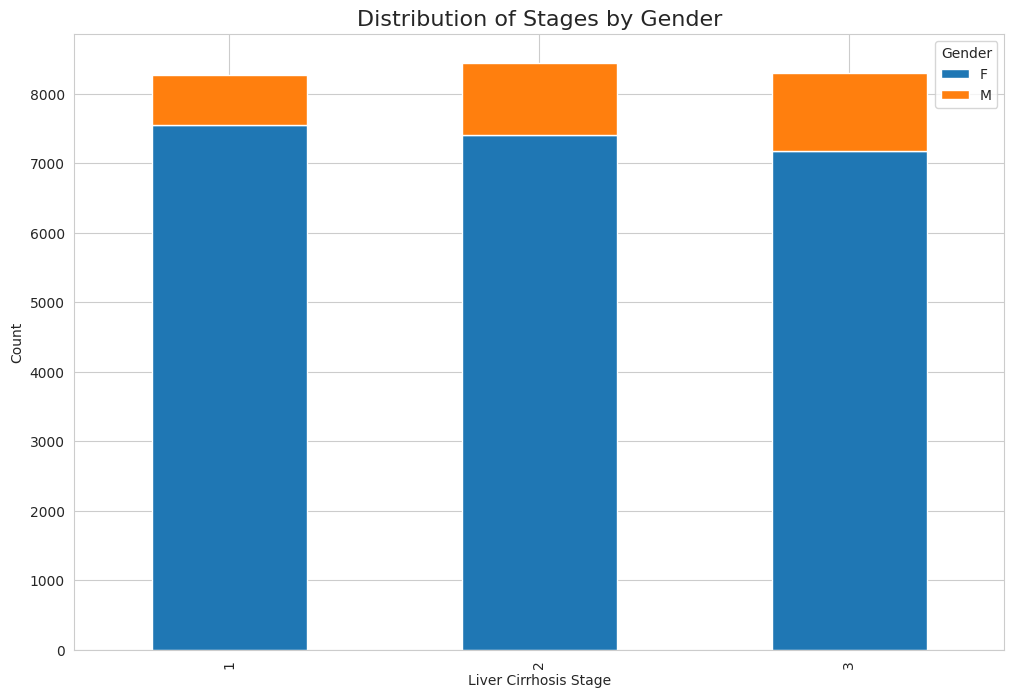

In [28]:
# Consider performing cross-tabulation
group_by_sex_and_stage = pd.crosstab(df_copy['Stage'], df_copy['Sex'])

# Visualizing the distribution using a stacked bar chart
group_by_sex_and_stage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Stages by Gender', fontsize=16)
plt.xlabel('Liver Cirrhosis Stage')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

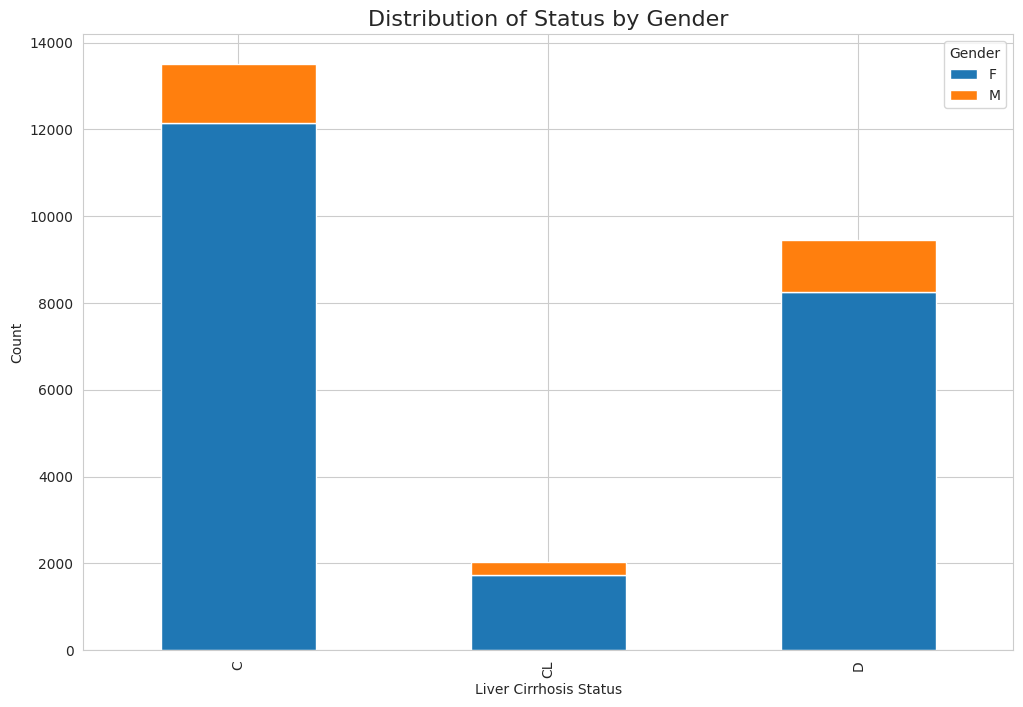

In [29]:
# Consider performing cross-tabulation
group_by_sex_and_status = pd.crosstab(df_copy['Status'], df_copy['Sex'])
# Cross-tabulating status by gender and plotting a stacked bar chart
group_by_sex_and_status.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Status by Gender', fontsize=16)
plt.xlabel('Liver Cirrhosis Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


Male participants exhibit notably higher average levels of Copper and Alkaline Phosphatase. In contrast, females demonstrate relatively elevated Platelet counts on average.

On average, males are 4 years older than their female counterparts within the study cohort.

A predominant proportion of male subjects in the research population experienced Stage 3 Liver Cirrhosis, with 39% affected by this advanced stage compared to 25% impacted by Stage 1. Consequently, the mortality rate among male subjects is notably higher in percentage terms.

Female subjects exhibit a more evenly distributed prevalence across Stages 1, 2, and 3 of Liver Cirrhosis, indicating a balanced representation of different disease stages among females in the study.




# DATA PREPROCESSING



In [30]:
# Label encoding categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the head of the modified DataFrame
print(df.head())


   N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0    2221       0     1  18499    0        0             1        0      0   
1    1230       0     1  19724    1        1             0        1      0   
2    4184       0     1  11839    0        0             0        0      0   
3    2090       2     1  16467    0        0             0        0      0   
4    2105       2     1  21699    0        0             1        0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0         

Train-Test Split and Dataset Shape Analysis

In [31]:
# Performing train-test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], random_state=3, train_size=.7)

# Outputting dataset shapes
print(f"Training Features Shape: {x_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Features Shape: {x_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (17500, 18)
Training Target Shape: (17500,)
Testing Features Shape: (7500, 18)
Testing Target Shape: (7500,)


Feature Scaling with MinMaxScaler for Training and Testing Data

In [32]:
# Fit transforming MinMaxScaler on training and testing data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Ensemble Learning with Voting Classifier using CatBoost, XGBoost, and LightGBM

In [33]:
# Initializing a Voting Classifier with CatBoost, XGBoost, and LightGBM models
voting_classifier = VotingClassifier(
    estimators=[('cat', CatBoostClassifier(verbose=0)), ('xg', XGBClassifier()), ('lgbm', LGBMClassifier(verbose=-1))],
    voting='soft',  # Using soft voting for probabilistic averaging of class labels
    verbose=False     # Suppressing verbosity during fitting
)

# Fitting the Voting Classifier on the training data
voting_classifier.fit(x_train, y_train)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fed25199660>),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=No...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier(verbose=-1))],
                 voting='soft')

Predicting with Voting Classifier on Test Data

In [34]:
# Making predictions on the test data using the trained Voting Classifier
y_pred = voting_classifier.predict(x_test)

Evaluating Model Performance with Classification Report

In [35]:

# Generating and printing the classification report for evaluating model performance
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2467
           2       0.96      0.95      0.95      2547
           3       0.97      0.97      0.97      2486

    accuracy                           0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500



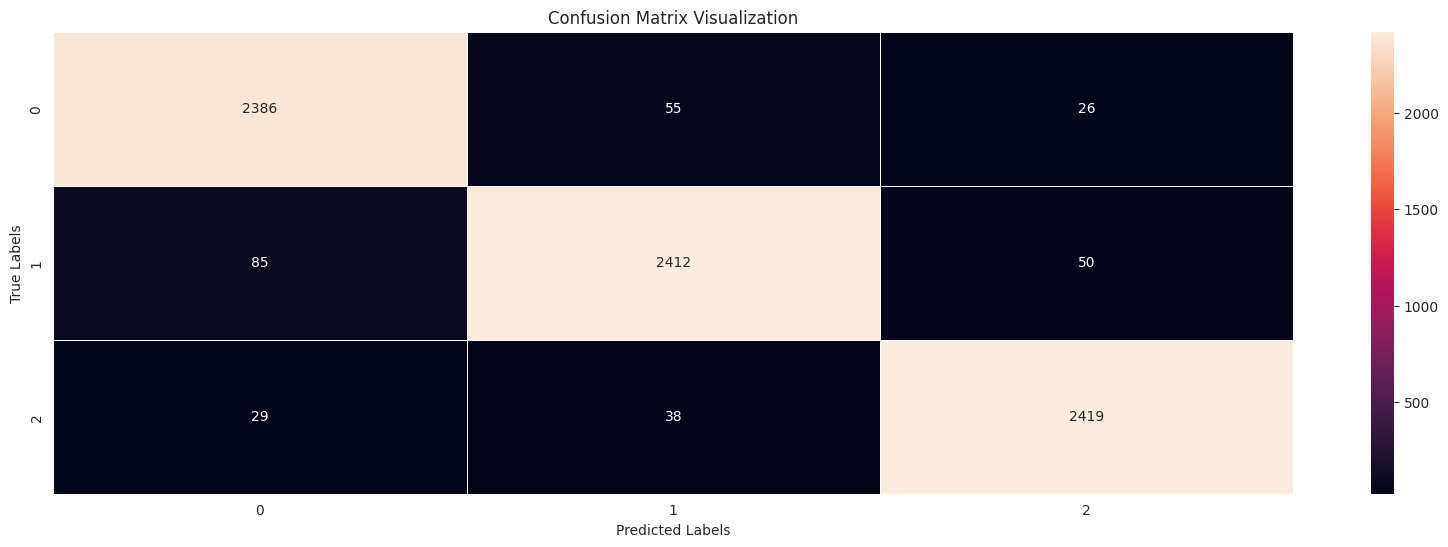

In [36]:
# Adjusting the figure size
plt.subplots(figsize=(20, 6))

# Creating a heatmap of the confusion matrix with annotations and custom styling
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", linewidths=0.5)

# Adding necessary labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')

# Displaying the heatmap
plt.show()

**Hypothesis 1**: **Drug Efficacy on Bilirubin Levels**

*Null Hypothesis (H0): There is no significant difference in the bilirubin levels between patients treated with the drug "D-penicill" and those given a placebo.*

*Alternative Hypothesis (H1): There is a significant difference in the bilirubin levels between patients treated with the drug "D-penicill" and those given a placebo.*

Explanation: Bilirubin is a measure of liver function. If "D-penicill" is effective, we would expect to see lower bilirubin levels in the treatment group compared to the placebo group.

Result Statement: After conducting an independent samples t-test, if the p-value is less than 0.05, we reject the null hypothesis and conclude that "D-penicill" has a significant effect on bilirubin levels. If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant difference.

In [53]:

# Hypothesis 1: Drug Efficacy on Bilirubin Levels
placebo_bilirubin = df[df['Drug'] == 0]['Bilirubin']
dpenicill_bilirubin = df[df['Drug'] == 1]['Bilirubin']

t_stat, p_val = stats.ttest_ind(placebo_bilirubin, dpenicill_bilirubin, nan_policy='omit')
print("Hypothesis 1: Drug Efficacy on Bilirubin Levels")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in bilirubin levels between the drug and placebo groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in bilirubin levels between the drug and placebo groups.")

Hypothesis 1: Drug Efficacy on Bilirubin Levels
T-statistic: -7.4007267029683, P-value: 1.397116129356663e-13
Conclusion: Reject the null hypothesis. There is a significant difference in bilirubin levels between the drug and placebo groups.


**Hypothesis 2: Drug Impact on Survival Time**

*Null Hypothesis (H0): There is no significant difference in survival time (N_Days) between patients treated with "D-penicill" and those given a placebo.*

*Alternative Hypothesis (H1): There is a significant difference in survival time (N_Days) between patients treated with "D-penicill" and those given a placebo.*

Explanation: Survival time is a critical measure of drug efficacy. A significant difference would indicate that "D-penicill" affects the length of survival in patients.

Result Statement: By conducting an independent samples t-test, if the p-value is less than 0.05, we reject the null hypothesis, indicating a significant difference in survival time between the two groups. If the p-value is greater than 0.05, we fail to reject the null hypothesis

In [47]:
# Hypothesis 2: Drug Impact on Survival Time
placebo_days = df[df['Drug'] == 0]['N_Days']
dpenicill_days = df[df['Drug'] == 1]['N_Days']

t_stat, p_val = stats.ttest_ind(placebo_days, dpenicill_days, nan_policy='omit')
print("\nHypothesis 2: Drug Impact on Survival Time")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in survival time between the drug and placebo groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in survival time between the drug and placebo groups.")



Hypothesis 2: Drug Impact on Survival Time
T-statistic: 14.36193420385705, P-value: 1.374972894417906e-46
Conclusion: Reject the null hypothesis. There is a significant difference in survival time between the drug and placebo groups.


**Hypothesis 3: Gender Differences in Liver Function**

*Null Hypothesis (H0): There is no significant difference in SGOT levels between male and female patients.*

*Alternative Hypothesis (H1): There is a significant difference in SGOT levels between male and female patients.*

Explanation: SGOT (AST) is an enzyme that is typically elevated in liver disease. This hypothesis tests whether gender plays a role in the enzyme levels.

Result Statement: After performing an independent samples t-test, if the p-value is less than 0.05, we reject the null hypothesis, suggesting that gender significantly affects SGOT levels. If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [48]:

# Hypothesis 3: Gender Differences in SGOT Levels
male_sgot = df[df['Sex'] == 1]['SGOT']
female_sgot = df[df['Sex'] == 0]['SGOT']

t_stat, p_val = stats.ttest_ind(male_sgot, female_sgot, nan_policy='omit')
print("\nHypothesis 3: Gender Differences in SGOT Levels")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in SGOT levels between males and females.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in SGOT levels between males and females.")


Hypothesis 3: Gender Differences in SGOT Levels
T-statistic: -0.0936422195190665, P-value: 0.9253941210862582
Conclusion: Fail to reject the null hypothesis. There is no significant difference in SGOT levels between males and females.


**Hypothesis 4: Ascites and Albumin Levels**

*Null Hypothesis (H0): There is no significant difference in albumin levels between patients with and without ascites.*

*Alternative Hypothesis (H1): There is a significant difference in albumin levels between patients with and without ascites.*

Explanation: Ascites is the accumulation of fluid in the abdomen, often due to liver disease, which can affect albumin levels in the blood.

Result Statement: Using an independent samples t-test, if the p-value is less than 0.05, we reject the null hypothesis, indicating that ascites status significantly affects albumin levels. If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [49]:
# Hypothesis 4: Ascites and Albumin Levels
ascites_albumin = df[df['Ascites'] == 1]['Albumin']
no_ascites_albumin = df[df['Ascites'] == 0]['Albumin']

t_stat, p_val = stats.ttest_ind(ascites_albumin, no_ascites_albumin, nan_policy='omit')
print("\nHypothesis 4: Ascites and Albumin Levels")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in albumin levels between patients with and without ascites.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in albumin levels between patients with and without ascites.")



Hypothesis 4: Ascites and Albumin Levels
T-statistic: -30.004761147319478, P-value: 2.3735170005815478e-194
Conclusion: Reject the null hypothesis. There is a significant difference in albumin levels between patients with and without ascites.


**Hypothesis 5: Relationship Between Edema and Bilirubin Levels**

*Null Hypothesis (H0): There is no significant correlation between edema status and bilirubin levels.*

*Alternative Hypothesis (H1): There is a significant correlation between edema status and bilirubin levels.*

Explanation: Edema, or swelling due to fluid retention, may be associated with liver dysfunction as measured by bilirubin levels.

Result Statement: After conducting a chi-square test for independence, if the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation between edema status and bilirubin levels. If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [50]:

# Hypothesis 5: Relationship Between Edema and Bilirubin Levels
contingency_table = pd.crosstab(df['Edema'], df['Bilirubin'] > df['Bilirubin'].median())
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print("\nHypothesis 5: Relationship Between Edema and Bilirubin Levels")
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant correlation between edema status and bilirubin levels.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant correlation between edema status and bilirubin levels.")


Hypothesis 5: Relationship Between Edema and Bilirubin Levels
Chi-square statistic: 808.0186376724873, P-value: 3.47521911153591e-176
Conclusion: Reject the null hypothesis. There is a significant correlation between edema status and bilirubin levels.


**Hypothesis 6: Impact of Hepatomegaly on Cholesterol Levels**

*Null Hypothesis (H0): There is no significant difference in cholesterol levels between patients with and without hepatomegaly.*

*Alternative Hypothesis (H1): There is a significant difference in cholesterol levels between patients with and without hepatomegaly.*

Explanation: Hepatomegaly (enlarged liver) could be associated with abnormal cholesterol levels.

Result Statement: Conducting an independent samples t-test, if the p-value is less than 0.05, we reject the null hypothesis, indicating that hepatomegaly status significantly affects cholesterol levels. If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [51]:

# Hypothesis 6: Impact of Hepatomegaly on Cholesterol Levels
hepatomegaly_cholesterol = df[df['Hepatomegaly'] == 1]['Cholesterol']
no_hepatomegaly_cholesterol = df[df['Hepatomegaly'] == 0]['Cholesterol']

t_stat, p_val = stats.ttest_ind(hepatomegaly_cholesterol, no_hepatomegaly_cholesterol, nan_policy='omit')
print("\nHypothesis 6: Impact of Hepatomegaly on Cholesterol Levels")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in cholesterol levels between patients with and without hepatomegaly.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in cholesterol levels between patients with and without hepatomegaly.")



Hypothesis 6: Impact of Hepatomegaly on Cholesterol Levels
T-statistic: 17.847359244030056, P-value: 8.340558350290529e-71
Conclusion: Reject the null hypothesis. There is a significant difference in cholesterol levels between patients with and without hepatomegaly.


# Installing the unavailable modules -- **if required**

In [5]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.2 MB/s eta 0:00:00


In [6]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


In [7]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 16.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=fa854997248897db72a9969af9c211b02d5b35ce6850d2d2e249addadfd0dee3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
